# Linear Regression

### Loading Libraries

In [30]:
# Numerical Computing
import numpy as np


# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib .pyplot import subplots

# StatsModel
import statsmodels .api as sm

# ISLP - Custom Libraries
from ISLP import load_data
from ISLP.models import ( ModelSpec as MS,
summarize,
poly)

In [2]:
from statsmodels .stats. outliers_influence \
import variance_inflation_factor as VIF
from statsmodels .stats.anova import anova_lm

#### Inspecting Objects & Namespaces

In [3]:
dir ()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '_1',
 '_2',
 '_3',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__pandas',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'dataframe_columns',
 'dataframe_hash',
 'dtypes_str',
 'exit',
 'get_dataframes',
 'get_ipython',
 'getpass',
 'hashlib',
 'import_pandas_safely',
 'is_data_frame',
 'json',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [5]:
A = np.array ([3 ,5 ,11])

dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__

In [6]:
A.sum ()

np.int64(19)

### Simple Linear Regression

In [9]:
Boston = load_data("Boston")

Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [10]:
X = pd. DataFrame ({'intercept': np.ones(Boston.shape [0]),
                    'lstat': Boston['lstat']})

X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [11]:
y = Boston['medv']

model = sm.OLS(y, X)
results = model.fit ()

In [12]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


#### Using Transformations: Fit & Transform

In [13]:
design = MS(['lstat'])
design = design.fit(Boston)

X = design. transform (Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [14]:
design = MS(['lstat'])

X = design. fit_transform (Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [17]:
# results.summary()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           5.08e-88
Time:                        12:13:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.0

In [18]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [22]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})

newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [23]:
new_predictions = results. get_prediction(newX);

new_predictions . predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [24]:
new_predictions . conf_int (alpha =0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [25]:
new_predictions.conf_int (obs=True , alpha =0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

#### Defining Functions

In [26]:
def abline(ax , b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax. get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim)

In [27]:
def abline(ax , b, m, *args , ** kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax. get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim , *args , ** kwargs)

/var/folders/m3/3_zd43kn4nn3q52cpx_b38g00000gn/T/ipykernel_40962/1191972888.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params [0],
/var/folders/m3/3_zd43kn4nn3q52cpx_b38g00000gn/T/ipykernel_40962/1191972888.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params [1],


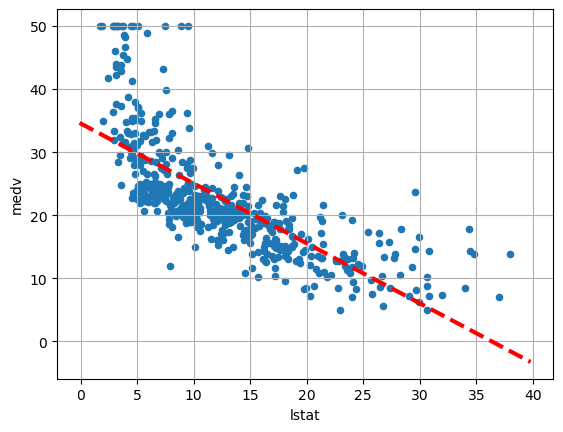

In [31]:
ax = Boston.plot.scatter('lstat', 'medv')

abline(ax,
       results.params [0],
       results.params [1],
       'r--',
       linewidth =3)

plt.grid(True)
plt.show()

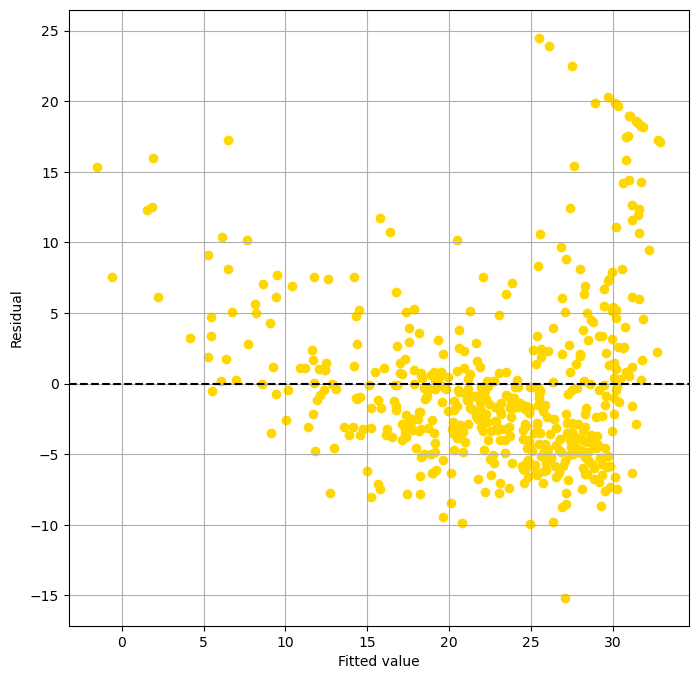

In [37]:
ax = subplots (figsize =(8 ,8))[1]

ax.scatter(results.fittedvalues , results.resid, color='gold')
ax. set_xlabel ('Fitted value')
ax. set_ylabel ('Residual')
ax.axhline (0, c='k', ls='--');
plt.grid(True)
plt.show()

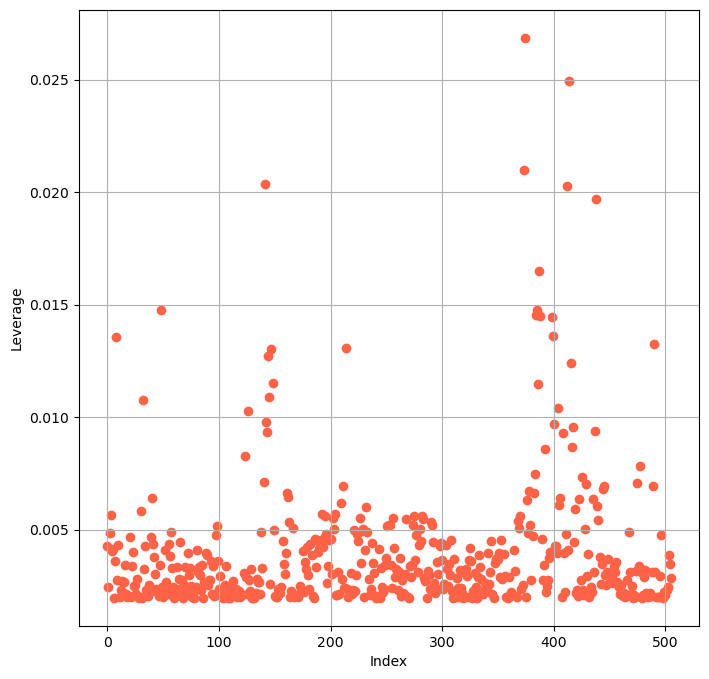

In [35]:
infl = results. get_influence ()

ax = subplots (figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape [0]) , infl. hat_matrix_diag, color='tomato')
ax. set_xlabel ('Index')
ax. set_ylabel ('Leverage')
np.argmax(infl. hat_matrix_diag)
plt.grid(True)
plt.show()

### Multiple Linear Regression

In [39]:
X = MS(['lstat', 'age']). fit_transform (Boston)

model1 = sm.OLS(y, X)
results1 = model1.fit ()

In [42]:
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [44]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [45]:
X = MS(terms). fit_transform (Boston)

model = sm.OLS(y, X)
results = model.fit ()

In [47]:
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [48]:
minus_age = Boston.columns.drop (['medv', 'age'])

Xma = MS( minus_age ). fit_transform (Boston)
model1 = sm.OLS(y, Xma)

In [51]:
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


### Multivariate Goodness of Fit

#### List Comprehension

In [52]:
vals = [VIF(X, i)
        for i in range (1, X.shape [1])]

vif = pd. DataFrame ({'vif':vals},
                     index=X.columns [1:])

vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [53]:
vals = []

for i in range (1, X.values.shape [1]):
    vals.append(VIF(X.values , i))

### Interaction Terms

In [54]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]). fit_transform (Boston)

model2 = sm.OLS(y, X)

In [56]:
summarize(model2.fit ())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### Non-linear Transformations of the Predictors

In [57]:
X = MS([ poly('lstat', degree =2), 'age']).fit_transform(Boston)

model3 = sm.OLS(y, X)
results3 = model3.fit()

In [58]:
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [59]:
anova_lm(results1 , results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


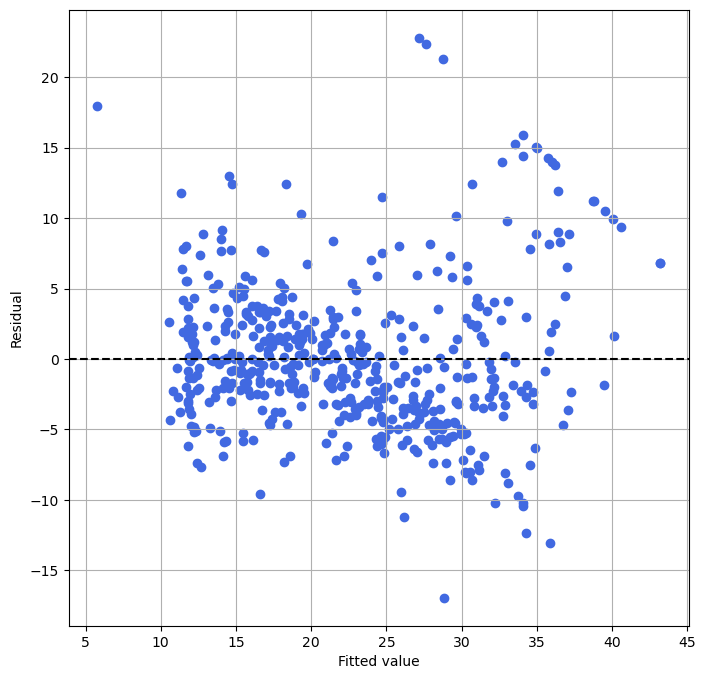

In [62]:
ax = subplots(figsize =(8 ,8))[1]

ax.scatter(results3 .fittedvalues, results3.resid, color='royalblue')
ax. set_xlabel ('Fitted value')
ax. set_ylabel ('Residual')
ax.axhline (0, c='k', ls='--')

plt.grid(True)
plt.show()

### Qualitative Predictors

In [77]:
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS
from ISLP.models.model_spec import Interaction

Carseats = load_data ('Carseats')

Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [72]:
# allvars = list(Carseats .columns.drop('Sales'))

# y = Carseats ['Sales']

# final = allvars + [('Income', 'Advertising'),
#                    ('Price ', 'Age ')]

# X = MS(final).fit_transform(Carseats)
# model = sm.OLS(y, X)

In [81]:
Carseats.columns = Carseats.columns.str.strip()

Carseats["Income_x_Advertising"] = Carseats["Income"] * Carseats["Advertising"]
Carseats["Price_x_Age"] = Carseats["Price"] * Carseats["Age"]

y = Carseats["Sales"]
allvars = list(Carseats.columns.drop("Sales"))

spec = MS(allvars)
X = spec.fit_transform(Carseats)

if not hasattr(X, "columns") or "Intercept" not in X.columns:
    X = sm.add_constant(X)

# 6) OLS
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          6.14e-166
Time:                        13:12:24   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept                6.5756 